<a href="https://colab.research.google.com/github/XH4V0C/collab_notebooks/blob/main/cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras import datasets, utils

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data() 

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
NUM_CLASSES = 10

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
y_train = utils.to_categorical(y_train,NUM_CLASSES)
y_test = utils.to_categorical(y_test,NUM_CLASSES)

In [ ]:
X_train[54,12,13,2]

0.16470589

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200,activation = 'relu'),
    layers.Dense(150,activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8372 - accuracy: 0.3375
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6607 - accuracy: 0.4075
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5778 - accuracy: 0.4379
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5284 - accuracy: 0.4543
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4903 - accuracy: 0.4681
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4601 - accuracy: 0.4812
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4337 - accuracy: 0.4886
Epoch 8/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4126 - accuracy: 0.4974
Epoch 9/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3907 - accuracy: 0.5048
Epoch 10/10
1563/1563 [==============================] - 15s 10ms/s

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4612 - accuracy: 0.4831


[1.4611839056015015, 0.4830999970436096]

In [ ]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

In [ ]:
preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

313/313 [==============================] - 1s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
n_to_show = 10

In [ ]:
indices = np.random.choice(range(len(X_test)),n_to_show)

In [ ]:
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

<Figure size 1440x504 with 0 Axes>

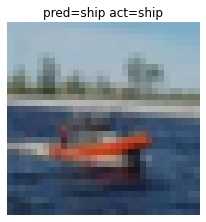

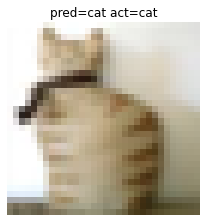

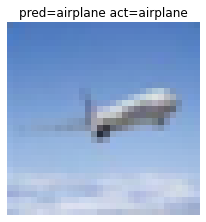

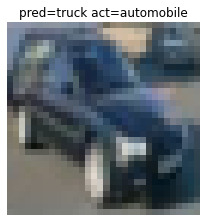

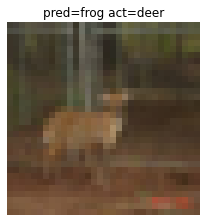

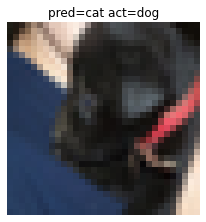

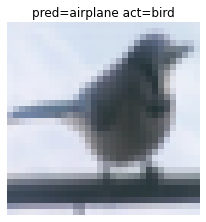

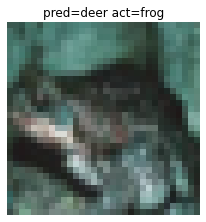

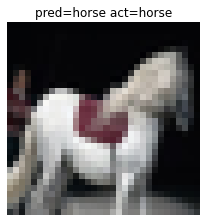

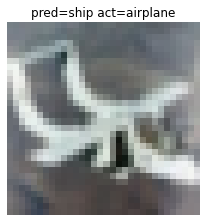

In [ ]:
for i, idx in enumerate(indices):
  img = X_test[idx]
  plt.figure(figsize=(20,8))
  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title('pred='+str(preds_single[idx]+' act='+str(actual_single[idx])))